In [1]:
import glob
from utils.build_dataset import build_dataset

images_path = './data/train/images/'
masks_path = './data/train/masks/'

input_img_names = glob.glob(images_path+'*.png')
output_img_names = glob.glob(masks_path+'*.png')

batch_size = 32

dataset = build_dataset(input_img_names, output_img_names, batch_size)

print(dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.int8, name=None))>


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from utils.build_dataset import split_dataset

train_dataset, test_dataset = split_dataset(dataset, 0.8)

print('train dataset size:', train_dataset.cardinality().numpy())
print('test dataset size:', test_dataset.cardinality().numpy())

train dataset size: 112
test dataset size: 13


### Load and train U-Net model

In [4]:
from utils.models import *
model = UNet().create_model()

model.compile(optimizer='Adam',loss='binary_crossentropy' ,metrics=['binary_accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   448         ['input_1[0][0]']                
                                16)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   2320        ['conv2d[0][0]']                 
                                16)                                                           

In [5]:
from utils.callback import callback_setup
import os 

backup_path = './backup'
checkpoint_name = "normal_unet_1/"

checkpoint_filepath = os.path.join(backup_path, checkpoint_name)
print(checkpoint_filepath)
model_callbacks = callback_setup(checkpoint_filepath=checkpoint_filepath, save_logs=True)

./backup\normal_unet_1/


In [6]:
load_model = False
epochs = 100

# load model if exists
if load_model and os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)

history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=(test_dataset),
                    verbose=1,
                    callbacks=model_callbacks)

Epoch 1/100
112/112 [==============================] - 23s 157ms/step - loss: 0.5217 - binary_accuracy: 0.7485 - val_loss: 0.3674 - val_binary_accuracy: 0.8409
Epoch 2/100
112/112 [==============================] - 17s 154ms/step - loss: 0.4922 - binary_accuracy: 0.7742 - val_loss: 0.4891 - val_binary_accuracy: 0.7704
Epoch 3/100
112/112 [==============================] - 17s 155ms/step - loss: 0.4122 - binary_accuracy: 0.8257 - val_loss: 0.3348 - val_binary_accuracy: 0.8678
Epoch 4/100
112/112 [==============================] - 18s 157ms/step - loss: 0.3532 - binary_accuracy: 0.8619 - val_loss: 0.3486 - val_binary_accuracy: 0.8680
Epoch 5/100
112/112 [==============================] - 18s 156ms/step - loss: 0.3115 - binary_accuracy: 0.8829 - val_loss: 0.2634 - val_binary_accuracy: 0.8958
Epoch 6/100
112/112 [==============================] - 18s 157ms/step - loss: 0.2836 - binary_accuracy: 0.8951 - val_loss: 0.2472 - val_binary_accuracy: 0.9126
Epoch 7/100
112/112 [===================

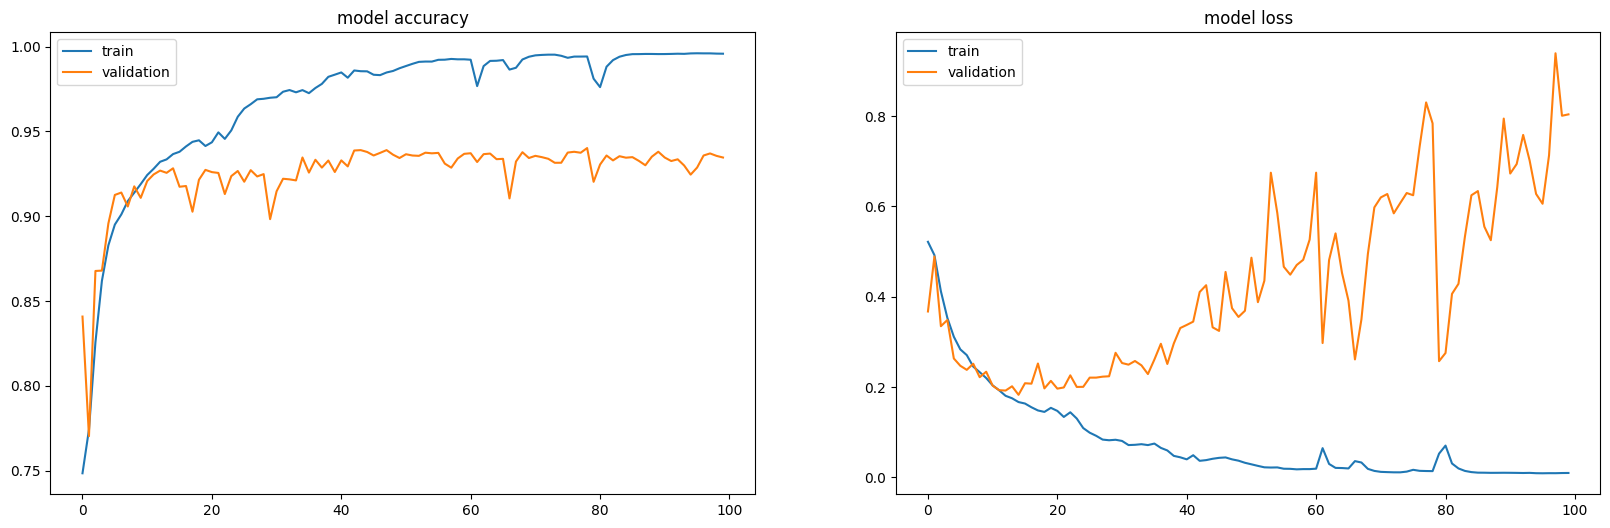

In [7]:
from utils.plot_and_save_history import plot_and_save_history

plot_and_save_history(history, checkpoint_name)

### Training of U-Net with conv layer with stride 2 instread of maxpooling

In [8]:
from utils.models import *
# U-Net with convolution layer with stride 2 instead of max pooling
model = UNetStride().create_model()
model.compile(optimizer='Adam',loss='binary_crossentropy' ,metrics=['binary_accuracy'])

In [9]:
from utils.callback import callback_setup
import os 

backup_path = './backup'
checkpoint_name = "stride2_unet_1/"

checkpoint_filepath = os.path.join(backup_path, checkpoint_name)
model_callbacks = callback_setup(checkpoint_filepath=checkpoint_filepath, save_logs=True)

In [10]:
load_model = False
epochs = 100

# load model if exists
if load_model and os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)
    
history = model.fit(train_dataset, 
                    epochs=epochs, 
                    validation_data=(test_dataset),
                    verbose=1,
                    callbacks=model_callbacks)

Epoch 1/100
112/112 [==============================] - 23s 188ms/step - loss: 0.5451 - binary_accuracy: 0.7385 - val_loss: 0.4292 - val_binary_accuracy: 0.7693
Epoch 2/100
112/112 [==============================] - 21s 185ms/step - loss: 0.4128 - binary_accuracy: 0.7965 - val_loss: 0.3530 - val_binary_accuracy: 0.8448
Epoch 3/100
112/112 [==============================] - 21s 187ms/step - loss: 0.3574 - binary_accuracy: 0.8617 - val_loss: 0.3589 - val_binary_accuracy: 0.8414
Epoch 4/100
112/112 [==============================] - 21s 190ms/step - loss: 0.3050 - binary_accuracy: 0.8886 - val_loss: 0.2623 - val_binary_accuracy: 0.9093
Epoch 5/100
112/112 [==============================] - 21s 187ms/step - loss: 0.2882 - binary_accuracy: 0.8916 - val_loss: 0.2492 - val_binary_accuracy: 0.9117
Epoch 6/100
112/112 [==============================] - 21s 192ms/step - loss: 0.2718 - binary_accuracy: 0.8984 - val_loss: 0.2241 - val_binary_accuracy: 0.9174
Epoch 7/100
112/112 [===================

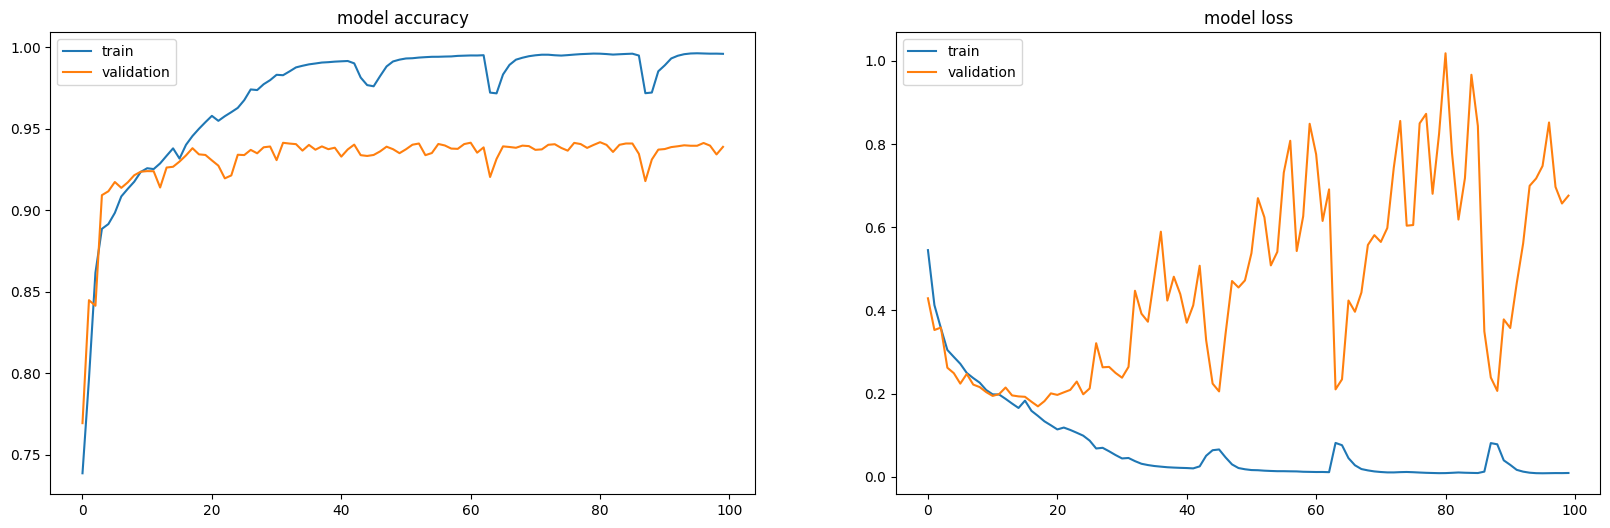

In [11]:
from utils.plot_and_save_history import plot_and_save_history

plot_and_save_history(history, checkpoint_name)